In [111]:
import urllib.request
csv_url = "http://www.minethatdata.com/Kevin_Hillstrom_MineThatData_E-MailAnalytics_DataMiningChallenge_2008.03.20.csv"
csv_filename = "source_data.csv"
with open(csv_filename, "w") as fp:
    data = urllib.request.urlopen(csv_url).read()
    fp.write(data.decode("ascii"))

In [103]:
import matplotlib.pyplot as plt
%matplotlib inline  

In [204]:
import numpy as np
import pandas as pd
from IPython.display import display
pd.set_option("display.max_rows",6)
source_df = pd.read_csv(csv_filename)
source_df

,recency,history_segment,history,mens,womens,zip_code,newbie,channel,segment,visit,conversion,spend
0,10,2) $100 - $200,142.44,1,0,Surburban,0,Phone,Womens E-Mail,0,0,0.0
1,6,3) $200 - $350,329.08,1,1,Rural,1,Web,No E-Mail,0,0,0.0
2,7,2) $100 - $200,180.65,0,1,Surburban,1,Web,Womens E-Mail,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
63997,6,1) $0 - $100,29.99,1,0,Urban,1,Phone,Mens E-Mail,0,0,0.0
63998,1,5) $500 - $750,552.94,1,0,Surburban,1,Multichannel,Womens E-Mail,0,0,0.0
63999,1,4) $350 - $500,472.82,0,1,Surburban,0,Web,Mens E-Mail,0,0,0.0


In [113]:
mailed_df = source_df[source_df["segment"] != "No E-Mail"]
mailed_df.reset_index(drop=True)

,recency,history_segment,history,mens,womens,zip_code,newbie,channel,segment,visit,conversion,spend
0,10,2) $100 - $200,142.44,1,0,Surburban,0,Phone,Womens E-Mail,0,0,0.0
1,7,2) $100 - $200,180.65,0,1,Surburban,1,Web,Womens E-Mail,0,0,0.0
2,9,5) $500 - $750,675.83,1,0,Rural,1,Web,Mens E-Mail,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
42691,6,1) $0 - $100,29.99,1,0,Urban,1,Phone,Mens E-Mail,0,0,0.0
42692,1,5) $500 - $750,552.94,1,0,Surburban,1,Multichannel,Womens E-Mail,0,0,0.0
42693,1,4) $350 - $500,472.82,0,1,Surburban,0,Web,Mens E-Mail,0,0,0.0


In [114]:
dummied_df = pd.get_dummies(mailed_df[['zip_code','channel']], drop_first=True)
dummied_df

,zip_code_Surburban,zip_code_Urban,channel_Phone,channel_Web
0,1,0,1,0
2,1,0,0,1
3,0,0,0,1
...,...,...,...,...
63997,0,1,1,0
63998,1,0,0,0
63999,1,0,0,1


In [115]:
feature_vector_df = mailed_df.drop(["history_segment", 'zip_code', 'channel', 'segment', 'visit', 'conversion', 'spend'],axis=1)
feature_vector_df = feature_vector_df.join(dummied_df)
feature_vector_df

,recency,history,mens,womens,newbie,zip_code_Surburban,zip_code_Urban,channel_Phone,channel_Web
0,10,142.44,1,0,0,1,0,1,0
2,7,180.65,0,1,1,1,0,0,1
3,9,675.83,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
63997,6,29.99,1,0,1,0,1,1,0
63998,1,552.94,1,0,1,1,0,0,0
63999,1,472.82,0,1,0,1,0,0,1


In [116]:
is_treat = mailed_df.segment == "Mens E-Mail"
is_cv    = mailed_df.visit == 1
from sklearn.model_selection import train_test_split
train_is_cv, test_is_cv, train_is_treat, test_is_treat, train_feature_vec, test_feature_vec =\
train_test_split(is_cv, is_treat, feature_vector_df, test_size=0.5, random_state=42)

In [117]:
train_feature_vec.reset_index(drop=True)
test_feature_vec.reset_index(drop=True)

,recency,history,mens,womens,newbie,zip_code_Surburban,zip_code_Urban,channel_Phone,channel_Web
0,2,165.48,0,1,1,1,0,0,1
1,3,106.90,1,0,0,0,1,0,1
2,2,402.98,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...
21344,1,841.18,1,1,1,1,0,0,0
21345,5,29.99,1,0,0,1,0,0,1
21346,1,57.44,1,0,0,1,0,0,1


In [118]:
train_feature_vec[~train_is_treat]

,recency,history,mens,womens,newbie,zip_code_Surburban,zip_code_Urban,channel_Phone,channel_Web
18424,8,118.27,0,1,1,0,1,1,0
23669,3,417.94,1,1,1,1,0,1,0
34030,7,361.71,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
32947,4,137.06,1,0,1,1,0,1,0
1291,7,324.67,0,1,0,0,1,0,1
23653,10,284.86,0,1,0,1,0,0,1


In [119]:
train_is_treat.value_counts()

True     10724
False    10623
Name: segment, dtype: int64

In [314]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
trt_model = LogisticRegression(C=0.001)
ctl_model = LogisticRegression(C=0.001)
bsc_model = LogisticRegression(C=0.001)
bsc_model.fit(train_feature_vec, train_is_cv.values.astype("int"))
trt_model.fit(train_feature_vec[train_is_treat],  train_is_cv[train_is_treat])
ctl_model.fit(train_feature_vec[~train_is_treat], train_is_cv[~train_is_treat])


LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [315]:
a = pd.DataFrame(np.array([bsc_model.predict_proba(test_feature_vec)[:,1], test_is_cv]).T)
a.columns = ['predict','cv']
print(
    a[a.cv==1]['predict'].mean(),
    a[a.cv==0]['predict'].mean())
print(
    log_loss(test_is_cv, bsc_model.predict_proba(test_feature_vec)[:,1]),
    log_loss(test_is_cv[test_is_treat], trt_model.predict_proba(test_feature_vec[test_is_treat])[:,1]),
    log_loss(test_is_cv[~test_is_treat], ctl_model.predict_proba(test_feature_vec[~test_is_treat])[:,1]),
    log_loss(pd.concat([test_is_cv[test_is_treat], test_is_cv[~test_is_treat]]),
             np.hstack([trt_model.predict_proba(test_feature_vec[test_is_treat])[:,1],
                       ctl_model.predict_proba(test_feature_vec[~test_is_treat])[:,1]]).flatten())
)

0.192320866899 0.177355365332
0.455352302547 0.480054469487 0.439457726111 0.459583989059


*** ウーン精度に問題があるのかな...単純に、 treatモデルのscore順に当てるのがよい？？

In [290]:
pd.concat([test_is_cv[test_is_treat], test_is_cv[~test_is_treat]])

7761     False
20064     True
24306    False
         ...  
55272    False
20229    False
32396     True
Name: visit, Length: 21347, dtype: bool

21347


/home/shirai/miniconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1714: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


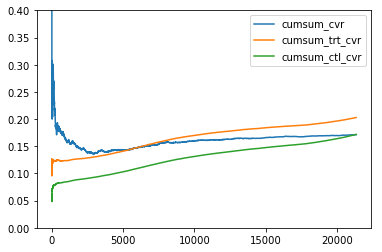

In [320]:
print(len(train_is_treat))
df = pd.concat((test_feature_vec, test_is_cv, test_is_treat), axis=1)
len(df)
df['trt_score'] = trt_model.predict_proba(test_feature_vec)[:,1]
df['ctl_score'] = ctl_model.predict_proba(test_feature_vec)[:,1]
df['score_ratio'] = df.trt_score / df.ctl_score
df.sort_values('score_ratio', ascending=False, inplace=True)#.reset_index(drop=True)
df = df.reset_index(drop=True)
df['cumsum_visit'] = df.expanding().sum()['visit']
df['mv_visit'] = df.rolling(2000).mean()['visit']
df['cumsum_cvr'] = df.expanding().mean()['visit']
df['cumsum_trt_cvr'] = df.expanding().mean()['trt_score']
df['cumsum_ctl_cvr'] = df.expanding().mean()['ctl_score']
df['mv_trt_cvr'] = df.rolling(2000).mean()['trt_score']
df['mv_ctl_cvr'] = df.rolling(2000).mean()['ctl_score']
df.filter(regex="^(?!zip|channel)")
df.plot(y=['cumsum_cvr','cumsum_trt_cvr', 'cumsum_ctl_cvr'], ylim=(0,0.4))

In [317]:
df

,recency,history,mens,womens,newbie,zip_code_Surburban,zip_code_Urban,channel_Phone,channel_Web,visit,...,trt_score,ctl_score,score_ratio,cumsum_visit,mv_visit,cumsum_cvr,cumsum_trt_cvr,cumsum_ctl_cvr,mv_trt_cvr,mv_ctl_cvr
0,1,3215.97,1,1,1,0,1,0,0,True,...,0.127103,0.061926,2.052501,1.0,NaN,1.000000,0.127103,0.061926,NaN,NaN
1,3,2809.79,1,0,1,1,0,0,0,False,...,0.122295,0.059780,2.045746,1.0,NaN,0.500000,0.124699,0.060853,NaN,NaN
2,6,2583.84,1,1,1,0,1,0,0,True,...,0.088378,0.044261,1.996755,2.0,NaN,0.666667,0.112592,0.055322,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21344,1,29.99,0,1,1,0,0,0,1,False,...,0.325633,0.325279,1.001087,3659.0,0.1905,0.171422,0.202853,0.171849,0.290120,0.279469
21345,1,29.99,0,1,1,0,0,0,1,False,...,0.325633,0.325279,1.001087,3659.0,0.1905,0.171414,0.202859,0.171856,0.290167,0.279523
21346,1,29.99,0,1,1,0,0,0,1,False,...,0.325633,0.325279,1.001087,3659.0,0.1905,0.171406,0.202865,0.171863,0.290183,0.279547
